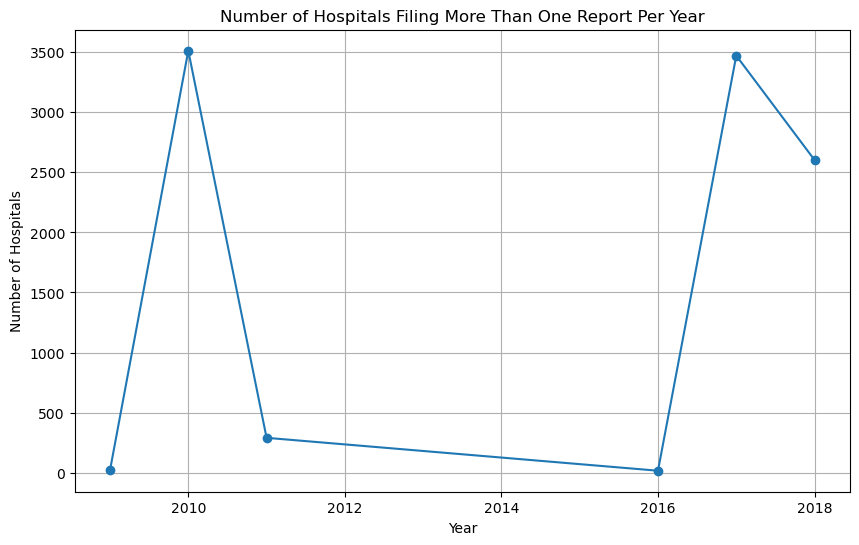

In [5]:
#1 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#reading data
hcris = pd.read_csv('../../data/Output/HCRIS.csv')
# Filter data to get hospitals with more than one report in the same year
duplicate_hospitals = hcris[hcris.duplicated(subset=['provider_number', 'fyear'], keep=False)]

# Count unique hospitals that filed more than one report per year
hospitals_over_time = duplicate_hospitals.groupby('fyear')['provider_number'].nunique()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(hospitals_over_time.index, hospitals_over_time.values, marker='o')
plt.title("Number of Hospitals Filing More Than One Report Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Hospitals")
plt.grid(True)
plt.show()




In [4]:
#Question 2

#Removing duplicate reports
unique_hospitals = hcris.drop_duplicates(subset=['provider_number', 'fyear'], keep='first')

#Count of number of unique hospital IDs
unique_hospital_count = unique_hospitals['provider_number'].nunique()

print(f"Number of Unique Hospital IDs: {unique_hospital_count}")


Number of unique hospital IDs: 6383


In [11]:
#Question 3 
hcris['tot_charges'] = pd.to_numeric(hcris['tot_charges'], errors='coerce')

#Remove rows with missing charges or years
charges_by_year = hcris[['fyear', 'tot_charges']].dropna()

# Plot violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='fyear', y='tot_charges', data=charges_by_year)
plt.title("Total Charges by Year")
plt.xlabel("Year")
plt.ylabel("Total Charges")
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

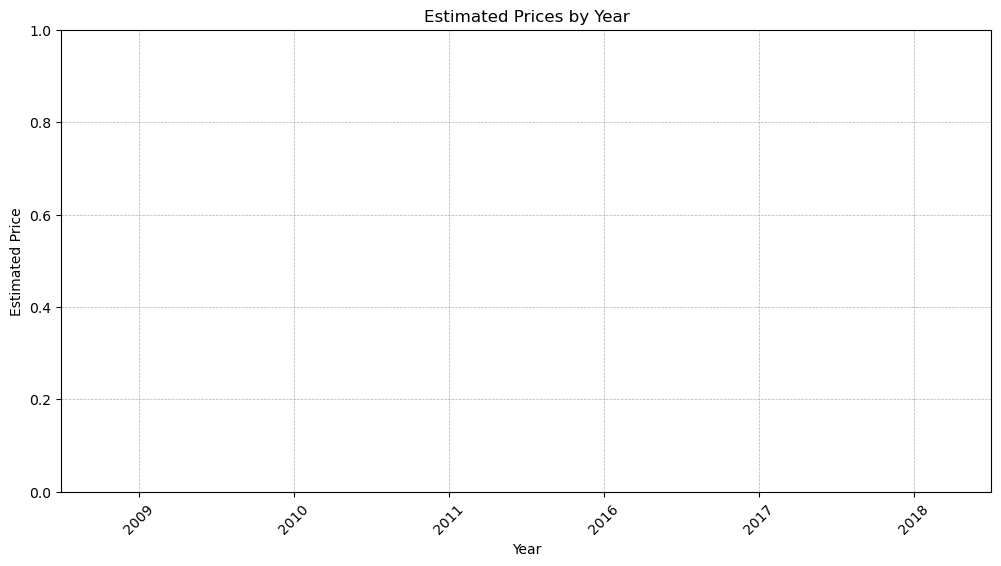

In [19]:
#Question 4
numeric_columns = [
    'tot_discounts', 'tot_charges', 'ip_charges', 'icu_charges', 'ancillary_charges',
    'tot_mcare_payment', 'tot_discharges', 'mcare_discharges'
]
hcris[numeric_columns] = hcris[numeric_columns].apply(pd.to_numeric, errors='coerce')

#Calculating estimated price (using formula)
hcris['discount_factor'] = 1 - hcris['tot_discounts'] / hcris['tot_charges']
hcris['price_num'] = (
    (hcris['ip_charges'] + hcris['icu_charges'] + hcris['ancillary_charges'])
    * hcris['discount_factor']
    - hcris['tot_mcare_payment']
)
hcris['price_denom'] = hcris['tot_discharges'] - hcris['mcare_discharges']
hcris['price'] = hcris['price_num'] / hcris['price_denom']

#remove negatives and outliers
hcris_df = hcris[(hcris['price'] > 0)]

#Plot violin plot 
plt.figure(figsize=(12, 6))
sns.violinplot(x='fyear', y='price', data=hcris)
plt.title("Estimated Prices by Year")
plt.xlabel("Year")
plt.ylabel("Estimated Price")
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



In [20]:
#Question 5
hcris_2012 = hcris_df[hcris_df['fyear'] == 2012]

